In [1]:
from pathlib import Path

import numpy as np
import pandas
import scipy.stats
import matplotlib.pyplot as plt
from cycler import cycler

In [6]:
save_figures = True

In [2]:
# Configure plot look

colour_cycle = plt.rcParamsDefault['axes.prop_cycle']
line_cycle = cycler('linestyle', [':'] + ['-'] * 4 + ['--'] + ['-']*4)
marker_cycle = cycler('marker', ['o', '^', 'D', 'X', 'P'] * 2)
plt.rcParams['axes.prop_cycle'] = (colour_cycle + line_cycle + marker_cycle)

plt.rcParams.update({'font.size': 14})
# plt.rcParams['figure.figsize'] = [600, 400]

In [10]:
source_file = Path('../data/analysis/dynamics.h5')

# Read in the dynamics
dynamics = pandas.read_hdf(source_file, 'dynamics')
dynamics = dynamics.query('pressure == 13.50')
dynamics = dynamics.groupby(['temperature', 'time']).mean().reset_index()
dynamics.temperature = dynamics.temperature.astype(float)

In [14]:
# Read in the traditional relaxation constants computed in relaxations.
relaxations = pandas.read_hdf(source_file, 'relaxations')
relaxations = relaxations.query('pressure == 13.50')

relaxations.reset_index(inplace=True)
relaxations.temperature = relaxations.temperature.astype(float)
relaxations['inv_temp'] = 1/relaxations.temperature

# Drop lowest temperature points -> not equilibrated
relaxations = relaxations.query('temperature >= 1.30 and temperature < 3.00')
dynamics = dynamics.query('temperature >= 1.30 and temperature < 3.00')

In [15]:
relaxations.columns

Index(['index', 'temperature', 'pressure', 'tau_D1_mean', 'tau_D1_hmean',
       'tau_D04_mean', 'tau_D04_hmean', 'tau_DL04_mean', 'tau_DL04_hmean',
       'tau_T2_mean', 'tau_T2_hmean', 'tau_T3_mean', 'tau_T3_hmean',
       'tau_T4_mean', 'tau_T4_hmean', 'max_alpha_time', 'tau_F',
       'max_gamma_time', 'diffusion_constant', 'tau_R1', 'tau_R2', 'tau_S',
       'inv_temp'],
      dtype='object')

## Figure 2

Changes in liquid dynamics as measured by the structural relaxation time.

The structural relaxation time is measured in two separate ways. 

- The quantity $\tau_s$ is the value for which the function $F(\tau_s) = 1/e$, where $F(t)$ is the fraction of particles whose center of mass remain within a distance of 0.4 of their initial positions
- The quantitiy $\tau_f$ which is the time taken for an individual particle to move a distance of 0.4 from it's initial position. This quantity is typically expressed as either the mean $\langle \tau_f \rangle$ or the harmonic mean $\langle 1/\tau_f \rangle$

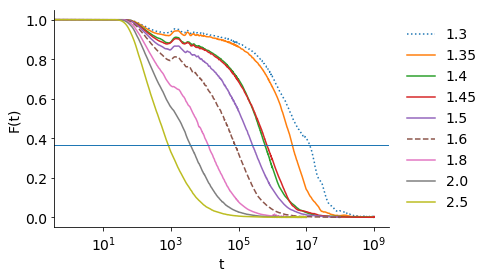

In [16]:
# Figure 2a

fig, ax = plt.subplots()
for label, group in dynamics.groupby('temperature'):
    if int(label*100) % 5 == 0:
        ax.plot('time', 'com_struct', marker="", label=label, data=group)
ax.set_xscale('log')
ax.set_xlabel('t')
ax.set_ylabel('F(t)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc='right', bbox_to_anchor=(1.3, 0.5), frameon=False)
ax.axhline(1/np.e, linewidth=1)
if save_figures:
    fig.savefig('../figures/figure2a.pdf')

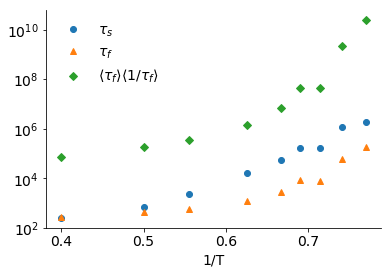

In [17]:
# Figure 2b

fig, ax = plt.subplots()
ax.plot(
    'inv_temp', 
    'tau_S', 
    linestyle='', 
    data=relaxations, 
    label=r'$\tau_s$',
)
ax.plot(
    'inv_temp', 
    'tau_D04_mean', 
    linestyle='', 
    data=relaxations, 
    label=r'$\tau_f$',
)
ax.plot(
    relaxations.inv_temp, 
    relaxations.tau_D04_mean * relaxations.tau_D04_hmean, 
    linestyle='',
    label=r'$\langle \tau_f \rangle \langle 1/\tau_f \rangle$',
)
ax.set_yscale('log')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon=False)
ax.set_xlabel('1/T')
if save_figures:
    fig.savefig('../figures/figure2b.pdf')

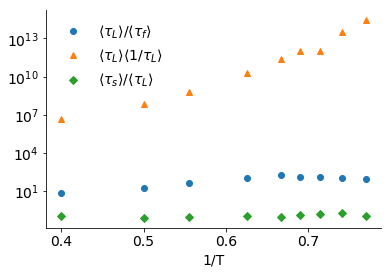

In [18]:
# Figure 3

fig, ax = plt.subplots()
ax.plot(
    relaxations.inv_temp,
    relaxations.tau_DL04_mean / relaxations.tau_D04_mean, 
    label=r'$\langle \tau_L \rangle / \langle \tau_f \rangle$',
    linestyle='',
)
ax.plot(
    relaxations.inv_temp,
    relaxations.tau_DL04_mean * relaxations.tau_DL04_hmean,
    label=r'$\langle \tau_L \rangle \langle 1/\tau_L \rangle$',
    linestyle='',
)
ax.plot(
    relaxations.inv_temp,
    relaxations.tau_S / relaxations.tau_DL04_mean,
    label=r'$\langle \tau_s \rangle / \langle \tau_L \rangle$',
    linestyle='',
)
ax.set_yscale('log')
ax.legend(frameon=False)
ax.set_xlabel('1/T')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
if save_figures:
    fig.savefig('../figures/figure3.pdf')

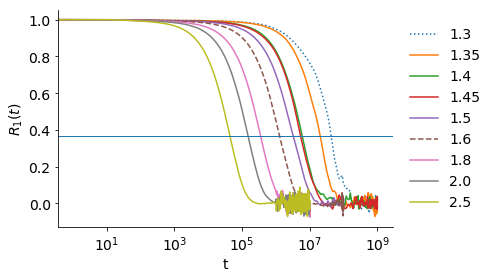

In [19]:
# Figure 4a

fig, ax = plt.subplots()
for label, group in dynamics.groupby('temperature'):
    if int(label*100) % 5 == 0:
        ax.plot('time', 'rot1', marker="", label=label, data=group)
ax.set_xscale('log')
ax.set_xlabel('t')
ax.set_ylabel(r'$R_1(t)$')
ax.legend(loc='right', bbox_to_anchor=(1.3, 0.5), frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axhline(1/np.e, lw=1)
if save_figures:
    fig.savefig('../figures/figure4a.pdf')

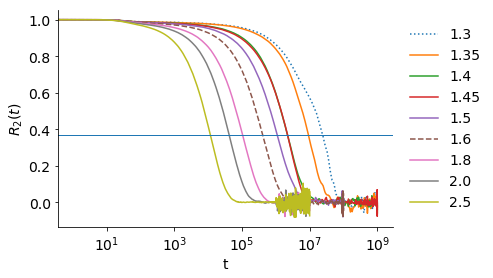

In [20]:
# Figure 4b

fig, ax = plt.subplots()
for label, group in dynamics.groupby('temperature'):
    if int(label*100) % 5 == 0:
        ax.plot('time', 'rot2', marker="", label=label, data=group)
ax.set_xscale('log')
ax.set_xlabel('t')
ax.set_ylabel(r'$R_2(t)$')
ax.legend(loc='right', bbox_to_anchor=(1.3, 0.5), frameon=False)
ax.axhline(1/np.e, lw=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
if save_figures:
    fig.savefig('../figures/figure4b.pdf')

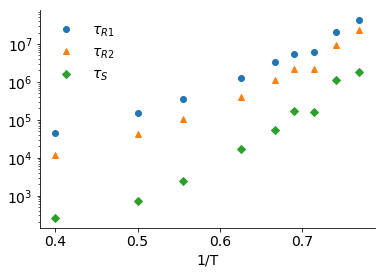

In [21]:
# Figure 5a

fig, ax = plt.subplots()
ax.plot(
    'inv_temp', 
    'tau_R1', 
    linestyle='', 
    data=relaxations, 
    label=r'$\tau_{R1}$',
)
ax.plot(
    'inv_temp', 
    'tau_R2', 
    linestyle='', 
    data=relaxations, 
    label=r'$\tau_{R2}$',
)
ax.plot(
    'inv_temp', 
    'tau_S', 
    linestyle='', 
    data=relaxations, 
    label=r'$\tau_S$',
)
ax.set_yscale('log')
ax.legend(frameon=False)
ax.set_xlabel('1/T')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
if save_figures:
    fig.savefig('../figures/figure5a.pdf')

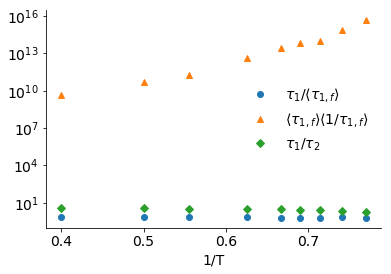

In [22]:
# Figure 5b

fig, ax = plt.subplots()
ax.plot(
    relaxations.inv_temp,
    relaxations.tau_R1 / relaxations.tau_T2_mean,
    label=r'$\tau_1 / \langle \tau_{1,f} \rangle$',
    linestyle='',
)
ax.plot(
    relaxations.inv_temp,
    relaxations.tau_T2_mean * relaxations.tau_T2_hmean,
    label=r'$\langle \tau_{1,f} \rangle \langle 1/\tau_{1,f} \rangle$',
    linestyle='',
)
ax.plot(
    relaxations.inv_temp,
    relaxations.tau_R1 / relaxations.tau_R2,
    label=r'$\tau_1 / \tau_2 $',
    linestyle='',
)
ax.set_yscale('log')
ax.legend(frameon=False)
ax.set_xlabel('1/T')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
if save_figures:
    fig.savefig('../figures/figure5b.pdf')

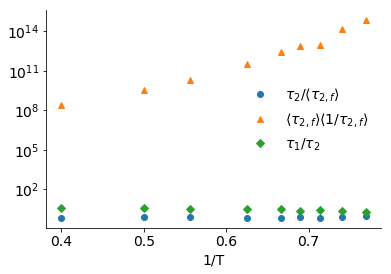

In [23]:
# Figure 5c

fig, ax = plt.subplots()
ax.plot(
    relaxations.inv_temp,
    relaxations.tau_R2 / relaxations.tau_T4_mean,
    label=r'$\tau_2 / \langle \tau_{2,f} \rangle$',
    linestyle='',
)
ax.plot(
    relaxations.inv_temp,
    relaxations.tau_T4_mean * relaxations.tau_T4_hmean,
    label=r'$\langle \tau_{2,f} \rangle \langle 1/\tau_{2,f} \rangle$',
    linestyle='',
)
ax.plot(
    relaxations.inv_temp,
    relaxations.tau_R1 / relaxations.tau_R2,
    label=r'$\tau_1 / \tau_2 $',
    linestyle='',
)
ax.set_yscale('log')
ax.legend(frameon=False)
ax.set_xlabel('1/T')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
if save_figures:
    fig.savefig('../figures/figure5c.pdf')

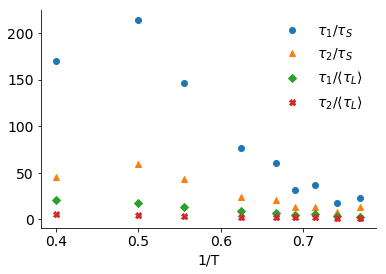

In [24]:
# Fig 6

fig, ax = plt.subplots()
ax.plot(
    relaxations.inv_temp,
    relaxations.tau_R1 / relaxations.tau_S,
    label=r'$\tau_1 / \tau_{S} $',
    linestyle='',
)
ax.plot(
    relaxations.inv_temp,
    relaxations.tau_R2 / relaxations.tau_S,
    label=r'$\tau_2 / \tau_S$',
    linestyle='',
)
ax.plot(
    relaxations.inv_temp,
    relaxations.tau_R1 / relaxations.tau_DL04_mean,
    label=r'$ \tau_1 / \langle \tau_L \rangle$',
    linestyle='',
)
ax.plot(
    relaxations.inv_temp,
    relaxations.tau_R2 / relaxations.tau_DL04_mean,
    label=r'$ \tau_2 / \langle \tau_L \rangle$',
    linestyle='',
)
ax.legend(frameon=False)
ax.set_xlabel('1/T')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
if save_figures:
    fig.savefig('../figures/figure6a.pdf')

In [25]:
# Figure 6b

df = pandas.read_hdf(source_file, 'molecular_relaxations', columns=['temperature', 'tau_DL04', 'tau_T2', 'tau_T4'])
df.replace(2**32-1, np.nan, inplace=True)
df.dropna(inplace=True)

T2_on_last = np.log10(df.tau_T2.values / df.tau_DL04.values)
T4_on_last = np.log10(df.tau_T4.values / df.tau_DL04.values)

del df

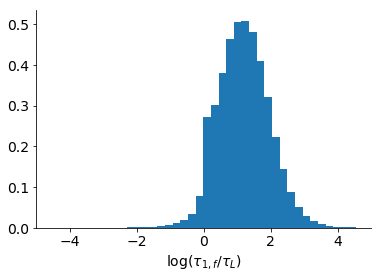

In [26]:
fig, ax = plt.subplots()
ax.hist(T2_on_last, bins=50, density=True)
ax.set_xlabel(r'$\log(\tau_{1,f}/\tau_L)$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(-5, 5)
if save_figures:
    fig.savefig('../figures/figure6b.pdf')

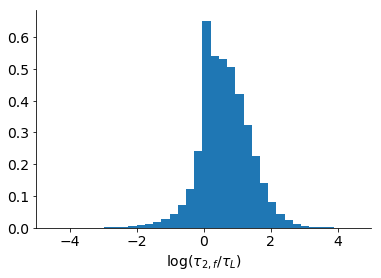

In [27]:
fig, ax = plt.subplots()
plt.hist(T4_on_last, 50, density=True)
ax.set_xlabel(r'$\log(\tau_{2,f}/\tau_L)$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xlim(-5, 5)
if save_figures:
    fig.savefig('../figures/figure6c.pdf')

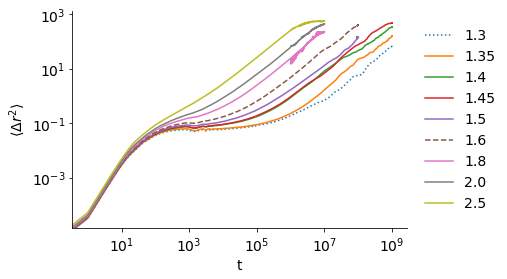

In [28]:
# Figure 7

fig, ax = plt.subplots()
for label, group in dynamics.groupby('temperature'):
    if int(label*100) % 5 == 0:
        ax.plot('time', 'msd', marker="", label=label, data=group)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('t')
ax.set_ylabel(r'$\langle \Delta r^2 \rangle$')
ax.legend(loc='right', bbox_to_anchor=(1.3, 0.5), frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
if save_figures:
    fig.savefig('../figures/figure7.pdf')

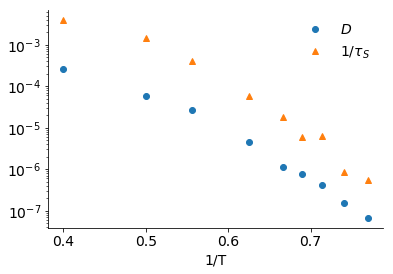

In [29]:
# Figure 8a

fig, ax = plt.subplots()
ax.plot(
    'inv_temp', 
    'diffusion_constant', 
    linestyle='', 
    data=relaxations, 
    label=r'$D$',
)
ax.plot(
    relaxations.inv_temp, 
    1/relaxations.tau_S, 
    linestyle='', 
    label=r'$1/\tau_S$',
)
ax.set_yscale('log')
ax.legend(frameon=False)
ax.set_xlabel('1/T')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
if save_figures:
    fig.savefig('../figures/figure8a.pdf')

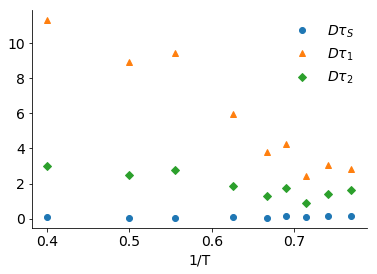

In [30]:
# Figure 8b

fig, ax = plt.subplots()
ax.plot(
    relaxations.inv_temp,
    relaxations.diffusion_constant * relaxations.tau_S, 
    linestyle='', 
    label=r'$D\tau_S$',
)
ax.plot(
    relaxations.inv_temp, 
    relaxations.diffusion_constant * relaxations.tau_R1,
    linestyle='', 
    label=r'$D\tau_1$',
)
ax.plot(
    relaxations.inv_temp, 
    relaxations.diffusion_constant * relaxations.tau_R2,
    linestyle='', 
    label=r'$D\tau_2$',
)
# ax.set_yscale('log')
ax.legend(frameon=False)
ax.set_xlabel('1/T')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
if save_figures:
    fig.savefig('../figures/figure8b.pdf')

In [37]:
# Figure 9

tau_DL04 = pandas.read_hdf(
    source_file, 
    'molecular_relaxations', 
    columns=['temperature', 'pressure', 'tau_DL04']
)
tau_DL04 = tau_DL04.query('pressure == 13.50')
tau_DL04.dropna(inplace=True)
tau_DL04.temperature = tau_DL04.temperature.astype(float)
tau_DL04 = tau_DL04.query('temperature >= 1.30 and temperature < 3.00')

values = []
random_repetitions = 10_000

def select_from_values(values, num_selected, repetitions):
    selected_values = []
    for _ in range(repetitions):
        selected_values.append(
            np.random.choice(values, size=num_selected).mean()
        )
    return scipy.stats.hmean(np.array(selected_values))

for label, group in tau_DL04.groupby(['temperature', 'pressure']):
    temperature, pressure = label
    for i in [0, 1, 2, 5, 10]:
        if i == 0:
            values.append({
                'inv_temp': 1/temperature,
                'num_picked': i,
                'value': scipy.stats.hmean(group.tau_DL04.values),
            })
        else:
            values.append({
                'inv_temp': 1/temperature,
                'num_picked': i,
                'value': select_from_values(group.tau_DL04.values, i, random_repetitions)
            })

del tau_DL04
df = pandas.DataFrame.from_records(values)

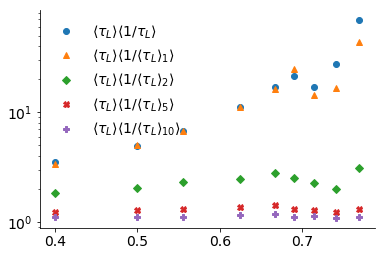

In [38]:
fig, ax = plt.subplots()
fig.frameon = False
for label, group in df.groupby('num_picked'):
    if label == 0:
        plot_label = r'$\langle \tau_L \rangle \langle 1 / \tau_L \rangle$'
    else: 
        plot_label = rf'$\langle \tau_L \rangle \langle 1 / \langle \tau_L \rangle_{{{label}}} \rangle$'
    ax.plot(
        relaxations.inv_temp, 
        relaxations.tau_DL04_mean.values / group.value.values, 
        linestyle="", 
        label=plot_label, 
    )
ax.set_yscale('log')
ax.legend(frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
if save_figures:
    fig.savefig('../figures/figure9.pdf')

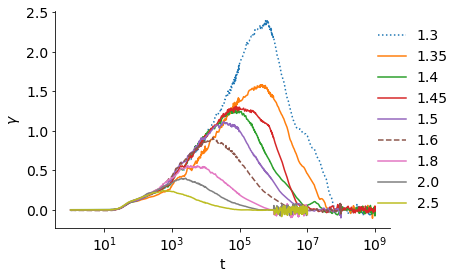

In [39]:
# Figure 10

fig, ax = plt.subplots()
fig.frameon = False
for label, group in dynamics.groupby('temperature'):
    if int(label*100) % 5 == 0:
        ax.plot('time', 'gamma', marker="", label=label, data=group)
ax.set_xscale('log')
ax.set_xlabel('t')
ax.set_ylabel(r'$\gamma$')
ax.legend(loc='right', bbox_to_anchor=(1.21, 0.5), frameon=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
if save_figures:
    fig.savefig('../figures/figure10.pdf')

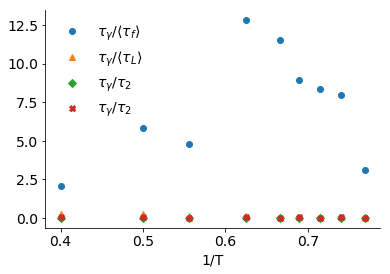

In [40]:
# Figure 11

fig, ax = plt.subplots()
ax.plot(
    relaxations.inv_temp,
    relaxations.max_gamma_time / relaxations.tau_D04_mean, 
    linestyle='', 
    label=r'$\tau_\gamma / \langle \tau_f \rangle$',
)
ax.plot(
    relaxations.inv_temp, 
    relaxations.max_gamma_time / relaxations.tau_DL04_mean,
    linestyle='', 
    label=r'$\tau_\gamma/\langle\tau_L\rangle$',
)
ax.plot(
    relaxations.inv_temp, 
    relaxations.max_gamma_time / relaxations.tau_R1,
    linestyle='', 
    label=r'$\tau_\gamma/\tau_2$',
)
ax.plot(
    relaxations.inv_temp, 
    relaxations.max_gamma_time / relaxations.tau_R2,
    linestyle='', 
    label=r'$\tau_\gamma/\tau_2$',
)
# ax.set_yscale('log')
ax.legend(frameon=False)
ax.set_xlabel('1/T')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
if save_figures:
    fig.savefig('../figures/figure11.pdf')